Computer vision is most popularly accomplished using neural networks, and the ones that are best at this task are Convolutional Neural Networks (aka convet, CNN).

## Convolution Neural Networks
These networks are comprised of two parts:

1. __Convolutional base__ that is used to _extract the features_ from an image. Consisted primarily of layers using the convolution operation, but often include other kinds of layers as well.

2. __Dense head__ that is used to _determine the class_ of the image. Consisted primarily of dense layers but might include others such as dropout.

The image below depicts 

In [3]:
from IPython.display import Image
Image(url="https://i.imgur.com/UUAafkn.png")

### Training the Classifier
This is typically done by reusing the base of a pretrained model, which we then attach an untrained head onto. This way we don't have to reinvent the wheel for every model.

### Convolution Operation
A convolution operation is defined as applying one function to another function to attain a third function. 
An example of this can be seen in the photo below, where a input image is applied a filter (or node in the neural network) to attain a result, which is passed along to the next step.

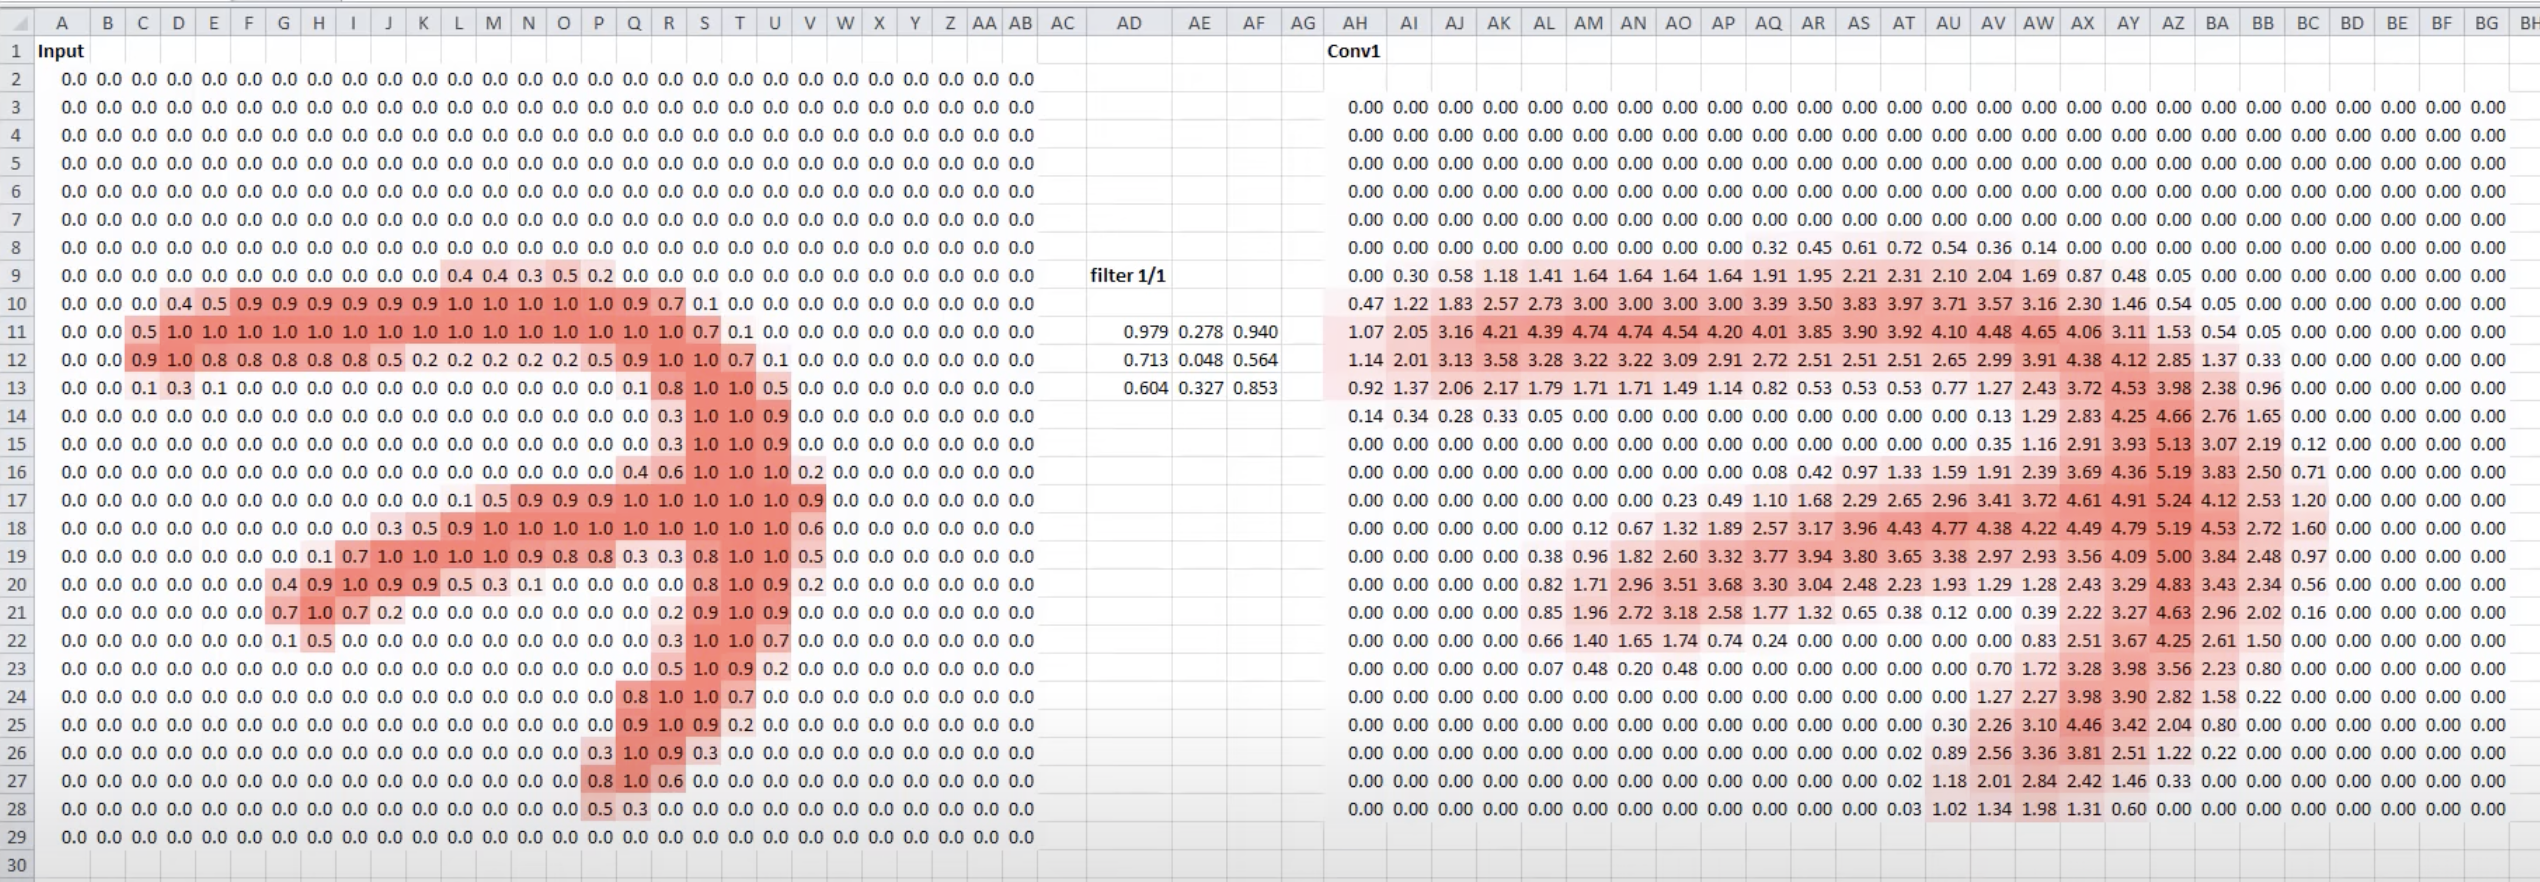

In [4]:
from IPython.display import Image
Image(filename="/Users/ryanheadley/Documents/GitHub/Development/kaggle/resources/convolution.png") 

A filter, usually, can be thought of as a 2D-matrix.

## Feature Extraction
The idea of feature extraction, is essentially the process of the convolution base. It consists of the following:

1. **Filter** an image for a particular feature (convolution)
2. **Detect** that feature within the filtered image (ReLU)
3. **Condense** the image to engance the features (maximum pooling)

In machine learning, the **weights** are the filters applied to the input to receive the output (as seen above in convolution operation). They can also be called **kernel**, and thought of as a lens that scans an image to provide a weighted sum of pixel values.

In [5]:
from IPython.display import Image
Image(url="https://i.imgur.com/j3lk26U.png", width=200)

The **activations** in the network are called **feature maps**, which contain the visual features that the kernel extracts. For example, the first two filters below can be applied to find horizontal shapes.

In [6]:
from IPython.display import Image
Image(url="https://i.imgur.com/JxBwchH.png", width=600)

## ReLU
ReLU activation, or the **rectifier function**, essentially scores pixel values according to some measure of importance. All negative values are equally unimportant, and as a result the values are "rectified" to 0, as seen below.

This function is **nonlinear**, which means that the total effect of all the layers in the network becomes different than what you would get by just adding the effects together -- this would be the same as what you could achieve with only a single layer. The nonlinearity ensures features will combine in interesting ways as they move deeper into the network. 

In [7]:
from IPython.display import Image
Image(url="https://i.imgur.com/DxGJuTH.png", width=300)

An example code base for applying this methodolgy with sympy, for a more numerical representation

In [11]:
# Sympy is a python library for symbolic mathematics. It has a nice
# pretty printer for matrices, which is all we'll use it for.
import sympy
import numpy as np
import tensorflow as tf
sympy.init_printing()
from IPython.display import display

image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

display(sympy.Matrix(image))
display(sympy.Matrix(kernel))
# Reformat for Tensorflow
image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

In [12]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID',
)
image_detect = tf.nn.relu(image_filter)

# The first matrix is the image after convolution, and the second is
# the image after ReLU.
display(sympy.Matrix(tf.squeeze(image_filter).numpy()))
display(sympy.Matrix(tf.squeeze(image_detect).numpy()))

⎡-2.0  2.0  0.0   0.0  0.0⎤
⎢                         ⎥
⎢-2.0  2.0  0.0   0.0  0.0⎥
⎢                         ⎥
⎢-2.0  2.0  0.0   0.0  0.0⎥
⎢                         ⎥
⎢-2.0  2.0  -1.0  0.0  0.0⎥
⎢                         ⎥
⎣-2.0  2.0  -1.0  0.0  0.0⎦

⎡0.0  2.0  0.0  0.0  0.0⎤
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎣0.0  2.0  0.0  0.0  0.0⎦

## Condense (Maximum Pooling)
This step enhances the features that have already been extracted.
The maximum pooling layer is very similar to the conv2d layer:

    - pool size is analogous to kernel_size
    - a maximum function is used instead of a kernel
    - a MaxPool2D layer doesn't have trainable weigths
    
After features have been extracted, the result contains a lot of "dead space", which can be thought of as 0s numerically. Instead of carrying all the 0 activations, which would increase the size of the model without adding value, the image is condensed to contain only the feature and nothing else. 

In short, maximum pooling takes a patch of activations in the original feature map and replaces them with the maximum activation in that patch, as seen in the image below.

In [13]:
from IPython.display import Image
Image(url="https://i.imgur.com/hK5U2cd.png", width=600)

Text(0.5, 1.0, 'Condense (MaxPool)')

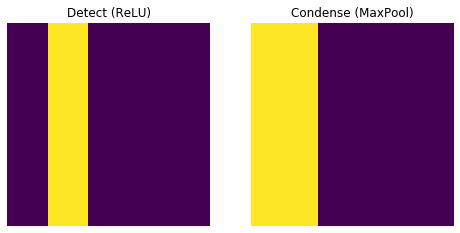

In [17]:
import matplotlib.pyplot as plt

image_condense = tf.nn.pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title("Detect (ReLU)")
plt.subplot(122)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title("Condense (MaxPool)")

### Translation Invariance
While pooling is extremely effective, overusing it will harm the results. For each pooling step, the position information associated with the image is reduced. This means that with repeated pooling, features that are close together can be erased and the information lost, while features that are far apart may remain unaffected.

In [18]:
from IPython.display import Image
Image(url="https://i.imgur.com/kUMWdcP.png", width=600)

In [19]:
from IPython.display import Image
Image(url="https://i.imgur.com/kUMWdcP.png", width=600)

## Global Average Pooling
Unline the `Flatten` function that transforms the 2D feature data to 1D data needed by the classifier, the `GlobalAvgPool2D` function replaces the entire feature map with its average value. Though destructive, it often works well and has the advantage of reducing the number of parameters in the model.

Calculating the average is like calculating the probability that the image contains a given feature. When comparing two objects, comparing the score of features is a simple calculation that can differenciate between the objects in question, such as a car and a truck, for example.


## Sliding Window
The convolution and pooling operations are both performed over a sliding window, where

- `window`: dimensions of the kernel, param `kernel_size`
    or `pool_window` with `pool_size` for pooling.
    
- `strides`: how far the window should move at each step

- `padding`: how to handle the pixels at the edges of the input. 
    
  
    

In [21]:
from IPython.display import Image
Image(url="https://i.imgur.com/LueNK6b.gif", width=200)

### Stride
The stride is defined for each dimension in the image. If the stride is greater than 1, then pixels will be skipped. This is usually not used for convolution layers since valuable information could be lost. However, pool layers almost always have strides greater than one, like `(2, 2)` or `(3, 3)`

In [20]:
from IPython.display import Image
Image(url="https://i.imgur.com/Tlptsvt.gif", width=200)

### Padding
Since the output is expanded from the input, the borders of the input image must be taken into account. The two padding options are `padding='same'` and `padding='valid'`

`padding='valid'` will force the convolution window to stay entirely inside the input. The drawback is that the output shrinks (loses pixels) and shrinks more for larger kernels. This limits the number of layers the network can contain, especially when inputs are small in size.

`padding='same'` will pad the input with 0's around its borders, using the exact amount of 0's necessary to make the size of the output the ~same~ as the size of the input. This can have the effect however of diluting the influence of pixels at the borders. The image below shows this padding. 

In [22]:
from IPython.display import Image
Image(url="https://i.imgur.com/RvGM2xb.gif", width=200)

## Data Augmentation
The best way to improve the performance of a machine learning model is to train it on more data. The more examples the model has to learn from, the better it can recognize which differences in images matter and which don't.

An easy way to augment training data with images is to flip, rotate, adjust contrast, warp, and many other things. These _transformations_ can be applied in combinations. 

An __important__ aspect of applying transformations is that they should not mix up the classes. For example, in an image classifier if you rotate a 9 to a 6, this is not improving your model.

Libraries like keras provide two ways of adding this functionality:
1. Include it in the data pipeline with a function like `ImageDataGenerator`
2. Include it in the model definition with a preprocessing layer